<a class="anchor" id="0"></a>
# **Ứng dụng Gaussian Naive Bayes trong bài toán Potential Customers**


# **1. Import các thư viện** <a class="anchor" id="5"></a>

--------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import warnings

warnings.filterwarnings('ignore')

# **2. Import dataset** <a class="anchor" id="6"></a>
-----

In [3]:
import pandas as pd
df = pd.read_csv("C:\\Users\\lephu\\doan1\\clients.csv")

# **3. Exploratory data analysis** <a class="anchor" id="7"></a>
-----

In [4]:
df.shape

(1723, 14)

Có 14 thuộc tính và 1723 trường hợp

### Kiểm tra 5 dòng đầu của dataset
------

In [5]:
df.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0,0
1,1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1,0
2,1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0,0
3,1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1,0


### View summary of dataset
----

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                1723 non-null   int64 
 1   credit_amount        1723 non-null   int64 
 2   credit_term          1723 non-null   int64 
 3   age                  1723 non-null   int64 
 4   sex                  1723 non-null   object
 5   education            1723 non-null   object
 6   product_type         1723 non-null   object
 7   having_children_flg  1723 non-null   int64 
 8   region               1723 non-null   int64 
 9   income               1723 non-null   int64 
 10  family_status        1723 non-null   object
 11  phone_operator       1723 non-null   int64 
 12  is_client            1723 non-null   int64 
 13  bad_client_target    1723 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 188.6+ KB


Dữ liệu không bị thiếu. Chúng ta tiếp  tục kiểm tra chi tiết ở bên dưới.

### Types of variables

Bộ dữ liệu gồm 2 loại int64 và object. Phân tích riêng 2 loại này.


### Explore categorical variablesm
-----

In [7]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('Có {} thuộc tính: \n'.format(len(categorical)))
print('',categorical)

Có 4 thuộc tính: 

 ['sex', 'education', 'product_type', 'family_status']


In [8]:
df[categorical].head()

,sex,education,product_type,family_status
0,male,Secondary special education,Cell phones,Another
1,male,Secondary special education,Household appliances,Another
2,female,Secondary special education,Household appliances,Another
3,male,Secondary special education,Cell phones,Unmarried
4,female,Higher education,Cell phones,Married


### Summary of categorical variables


- Có 4 thuộc tính có kiểu dữ liệu object:
 `sex`, `education`, `product_type`, `family_status`
 

In [9]:
df.isnull().sum()

month                  0
credit_amount          0
credit_term            0
age                    0
sex                    0
education              0
product_type           0
having_children_flg    0
region                 0
income                 0
family_status          0
phone_operator         0
is_client              0
bad_client_target      0
dtype: int64

### Frequency counts of categorical variables
---

In [10]:
for var in categorical:
    
    print(df[var].value_counts())

male      931
female    792
Name: sex, dtype: int64
Secondary special education       836
Higher education                  585
Secondary education               208
Incomplete higher education        86
Incomplete secondary education      5
PhD degree                          3
Name: education, dtype: int64
Cell phones                      498
Household appliances             471
Computers                        178
Furniture                        164
Clothing                          88
Cosmetics and beauty services     55
Windows & Doors                   47
Tourism                           37
Jewelry                           36
Construction Materials            30
Medical services                  27
Fitness                           25
Auto                              21
Boats                             11
Training                          10
Audio & Video                      9
Sporting goods                     6
Garden equipment                   3
Repair Services         

In [11]:
for var in categorical: 
    
    print(df[var].value_counts() / float(len(df)))

male      0.540337
female    0.459663
Name: sex, dtype: float64
Secondary special education       0.485200
Higher education                  0.339524
Secondary education               0.120720
Incomplete higher education       0.049913
Incomplete secondary education    0.002902
PhD degree                        0.001741
Name: education, dtype: float64
Cell phones                      0.289031
Household appliances             0.273360
Computers                        0.103308
Furniture                        0.095183
Clothing                         0.051074
Cosmetics and beauty services    0.031921
Windows & Doors                  0.027278
Tourism                          0.021474
Jewelry                          0.020894
Construction Materials           0.017411
Medical services                 0.015670
Fitness                          0.014510
Auto                             0.012188
Boats                            0.006384
Training                         0.005804
Audio & Video   

Ta thấy dữ liệu không bị xuất hiện trường hợp bị thiếu và phải lưu bằng ký hiệu đặc biệt khác 

### Explore Numerical Variables
-----

In [12]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('Có {} thuộc tính int:\n'.format(len(numerical)))

print('', numerical)

Có 10 thuộc tính int:

 ['month', 'credit_amount', 'credit_term', 'age', 'having_children_flg', 'region', 'income', 'phone_operator', 'is_client', 'bad_client_target']


In [13]:
df[numerical].head()

,month,credit_amount,credit_term,age,having_children_flg,region,income,phone_operator,is_client,bad_client_target
0,1,7000,12,39,0,2,21000,0,0,0
1,1,19000,6,20,1,2,17000,3,1,0
2,1,29000,12,23,0,2,31000,2,0,0
3,1,10000,12,30,1,2,31000,3,1,0
4,1,14500,12,25,0,2,26000,0,1,0


### Summary of numerical variables


- Có 6 thuộc tính kiểu dữ liệu int `month`, `credit_amount`, `credit_term`, `age`, `having_children_flg`, `region`, `income`, `phone_operator`, `is_client`, `bad_client_target`

- Tất cả đều có các biến số rời rạc

- `bad_client_target` là thuộc tính phân lớp

### Explore problems within numerical variables

Kiểm tra tương tự như thuộc tính object

### Missing values in numerical variables
----

In [14]:
df[numerical].isnull().sum()

month                  0
credit_amount          0
credit_term            0
age                    0
having_children_flg    0
region                 0
income                 0
phone_operator         0
is_client              0
bad_client_target      0
dtype: int64

Không có dữ liệu bị thiếu. 

# **4. Declare feature vector and target variable** <a class="anchor" id="8"></a>

------

In [15]:
x = df.drop(['bad_client_target'],axis=1)
y = df['bad_client_target']

# **5. Split data into separate training and test set** <a class="anchor" id="9"></a>

------

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 58)


In [17]:
x_train.shape, x_test.shape

((1206, 13), (517, 13))

# **6. Kiểm tra lại dữ liệu test** <a class="anchor" id="10"></a>

----

In [18]:
x_train.dtypes

month                   int64
credit_amount           int64
credit_term             int64
age                     int64
sex                    object
education              object
product_type           object
having_children_flg     int64
region                  int64
income                  int64
family_status          object
phone_operator          int64
is_client               int64
dtype: object

In [19]:
categorical = [col for col in x_train.columns if x_train[col].dtypes == 'O']

categorical

['sex', 'education', 'product_type', 'family_status']

In [20]:
numerical = [col for col in x_train.columns if x_train[col].dtypes != 'O']

numerical

['month',
 'credit_amount',
 'credit_term',
 'age',
 'having_children_flg',
 'region',
 'income',
 'phone_operator',
 'is_client']

### Engineering missing values in categorical variables

In [21]:
x_train[categorical].isnull().sum()

sex              0
education        0
product_type     0
family_status    0
dtype: int64

In [22]:
for col in categorical:
    if x_train[col].isnull().mean()>0:
        print(col, (x_train[col].isnull().mean()))

In [23]:
x_test[categorical].isnull().sum()

sex              0
education        0
product_type     0
family_status    0
dtype: int64

In [24]:
x_train.isnull().sum()

month                  0
credit_amount          0
credit_term            0
age                    0
sex                    0
education              0
product_type           0
having_children_flg    0
region                 0
income                 0
family_status          0
phone_operator         0
is_client              0
dtype: int64

In [25]:
x_test.isnull().sum()

month                  0
credit_amount          0
credit_term            0
age                    0
sex                    0
education              0
product_type           0
having_children_flg    0
region                 0
income                 0
family_status          0
phone_operator         0
is_client              0
dtype: int64

### Encode categorical variables
----

In [26]:
# print categorical variables

categorical

['sex', 'education', 'product_type', 'family_status']

In [27]:
x_train[categorical].head()

,sex,education,product_type,family_status
1252,female,Secondary special education,Cell phones,Married
1445,female,Secondary special education,Computers,Another
58,male,Higher education,Furniture,Another
1623,male,Secondary education,Household appliances,Another
128,male,Secondary special education,Cell phones,Married


In [28]:
import category_encoders as ce

In [29]:
encoder = ce.OneHotEncoder(cols=['sex','education','product_type','family_status'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [30]:
x_train.head()

,month,credit_amount,credit_term,age,sex_1,sex_2,education_1,education_2,education_3,education_4,...,product_type_21,product_type_22,having_children_flg,region,income,family_status_1,family_status_2,family_status_3,phone_operator,is_client
1252,10,17000,6,25,1,0,1,0,0,0,...,0,0,0,2,28000,1,0,0,1,0
1445,11,19000,12,30,1,0,1,0,0,0,...,0,0,1,2,41000,0,1,0,0,1
58,1,21000,18,28,0,1,0,1,0,0,...,0,0,1,2,21000,0,1,0,0,1
1623,12,23500,12,58,0,1,0,0,1,0,...,0,0,0,2,8000,0,1,0,2,1
128,1,31500,6,39,0,1,1,0,0,0,...,0,0,0,0,42000,1,0,0,1,1


In [31]:
x_train.shape

(1206, 42)

Tương tự với `x_test`.

In [32]:
x_test.head()

,month,credit_amount,credit_term,age,sex_1,sex_2,education_1,education_2,education_3,education_4,...,product_type_21,product_type_22,having_children_flg,region,income,family_status_1,family_status_2,family_status_3,phone_operator,is_client
399,3,21000,6,29,1,0,0,1,0,0,...,0,0,0,1,31000,0,1,0,1,0
230,2,21000,24,27,0,1,1,0,0,0,...,0,0,1,2,16000,0,1,0,1,0
421,3,176000,36,87,0,1,0,1,0,0,...,0,0,0,2,26000,0,0,1,0,1
693,6,19000,12,23,1,0,1,0,0,0,...,0,0,0,2,26000,1,0,0,1,1
1516,11,10500,12,23,0,1,1,0,0,0,...,0,0,1,2,18000,0,1,0,4,1


In [33]:
x_test.shape

(517, 42)

Đã có sẵn bộ đào tạo và thử nghiệm để xây dựng mô hình. Trước đó, chúng ta nên ánh xạ tất cả các biến đối tượng vào cùng một tỷ lệ.



----

# **8. Model training** <a class="anchor" id="12"></a>

-----

In [34]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train, y_train)

GaussianNB()

# **9. Predict the results** <a class="anchor" id="13"></a>

-----


In [35]:
y_pred = nb.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **10. Check accuracy score** <a class="anchor" id="14"></a>
------

In [36]:
from sklearn.metrics import accuracy_score

print('Độ chính xác mô hình: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Độ chính xác mô hình: 0.8781


**y_test** là lớp thực and **y_pred** là lớp dự đoán.

### Compare the train-set and test-set accuracy


Bây giờ, so sánh độ chính xác của train-set và test-set để kiểm tra xem có bị overfitting hay không.

In [37]:
y_pred_train = nb.predict(x_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
print('Độ chính xác: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Độ chính xác: 0.8889


### Check for overfitting and unberfitting

In [39]:
print('Training set score: {:.4f}'.format(nb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(nb.score(x_test, y_test)))

Training set score: 0.8889
Test set score: 0.8781


Độ chính xác training là 0,8889 trong khi độ chính xác của testing là 0,8781. Hai giá trị này có thể xem là tương đương nhau. Vì vậy, không có dấu hiệu của việc overfitting.

### Compare model accuracy with null accuracy


Vì vậy, độ chính xác của mô hình là 0,8781. Tuy nhiên, chúng tôi không thể nói rằng mô hình của chúng tôi là rất tốt dựa trên độ chính xác ở trên. Chúng ta phải so sánh nó với độ **Null accuracy**. Null accuracy là độ chính xác có thể đạt được bằng cách luôn dự đoán lớp thường xuyên nhất. Vì vậy, trước tiên chúng ta nên kiểm tra sự phân bố lớp trong tập kiểm tra.

In [40]:
y_test.value_counts()

0    457
1     60
Name: bad_client_target, dtype: int64

Chúng ta có thể thấy rằng số lần xuất hiện của lớp thường xuyên nhất là 463. Vì vậy, chúng ta có thể tính toán độ chính xác rỗng bằng cách chia 463 cho tổng số lần xuất hiện.

In [41]:
null_accuracy = (463/(463+54))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8956


Độ chính xác của mô hình là 0,8839 còn điểm chính xác rỗng là 0,8956. 

Có thể kết luận rằng độ chính xác của mô hình là rất tốt. 

Tuy nhiên, nó không cung cấp phân phối cơ bản của các giá trị. 

Ngoài ra, nó không cho biết bất cứ điều gì về loại lỗi mà người phân loại đang thực hiện. Có một công cụ khác được gọi là **Confusion matrix** để giải quyết vấn đề này.

# **11. Confusion matrix** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)


**Confusion matrix** là một công cụ để tóm tắt hiệu suất của một thuật toán phân loại.Confusion matrix cho chúng ta một bức tranh rõ ràng về hiệu suất của mô hình phân loại và các loại lỗi do mô hình tạo ra. Nó cung cấp một bản tóm tắt các dự đoán đúng và sai được chia nhỏ theo từng danh mục. Bản tóm tắt được trình bày dưới dạng bảng.


Có thể có bốn loại kết quả trong khi đánh giá hoạt động của mô hình phân loại. Bốn kết quả này được mô tả dưới đây:

**True Positives (TP)** – xảy ra khi chúng ta dự đoán một quan sát thuộc về một lớp nhất định và quan sát thực sự thuộc về lớp đó.


**True Negatives (TN)** –  xảy ra khi chúng ta dự đoán một quan sát không thuộc một lớp nhất định và quan sát thực sự không thuộc lớp đó.


**False Positives (FP)** – xảy ra khi chúng ta dự đoán một quan sát thuộc một lớp nào đó nhưng quan sát thực sự không thuộc lớp đó. Loại lỗi này được gọi là **lỗi Loại I**.



**False Negatives (FN)** –  xảy ra khi chúng ta dự đoán một quan sát không thuộc về một lớp nào đó nhưng quan sát thực sự thuộc về lớp đó. Đây là một lỗi rất nghiêm trọng và nó được gọi là **lỗi Loại II**.


Bốn kết quả này được tóm tắt trong một confusion matrix được đưa ra dưới đây.

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[453   4]
 [ 59   1]]

True Positives(TP) =  453

True Negatives(TN) =  1

False Positives(FP) =  4

False Negatives(FN) =  59


<Axes: >

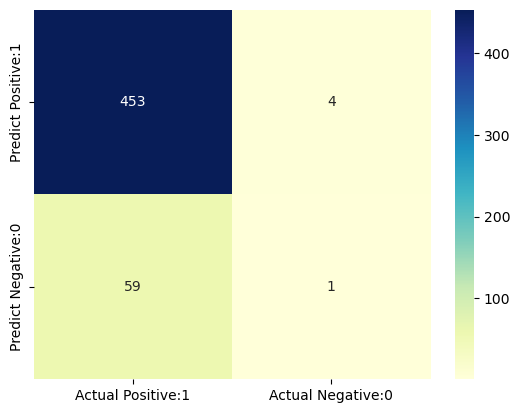

In [43]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **12. Classification report** <a class="anchor" id="16"></a>

-----

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       457
           1       0.20      0.02      0.03        60

    accuracy                           0.88       517
   macro avg       0.54      0.50      0.48       517
weighted avg       0.81      0.88      0.83       517



# **15. k-Fold Cross Validation** <a class="anchor" id="19"></a>
-----

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.88429752 0.88429752 0.88429752 0.88429752 0.87603306 0.88429752
 0.89166667 0.89166667 0.88333333 0.85      ]


In [54]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8814
